In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("cat.png")
img_rgb = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

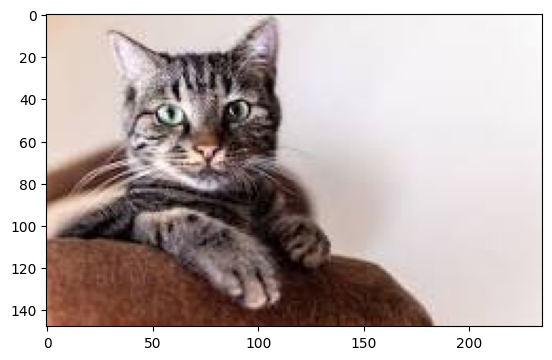

In [3]:
plt.imshow(img_rgb)

In [4]:
# sobel filter for detecting verticle and horizontal edges,/
# also do so usimg canny filter /
# explore and use laplacian filter, /
# explore and use haris corner detector/
# explore and use sift/
# apply various filter bank to detect texture in the image/
# assuming that your task is to classify image in 3 classes (dog, cat, horse etc) extract feature from the image using various feature extraction process/

# 1. Sobel Filter (Vertical & Horizontal Edges)

In [5]:
image = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

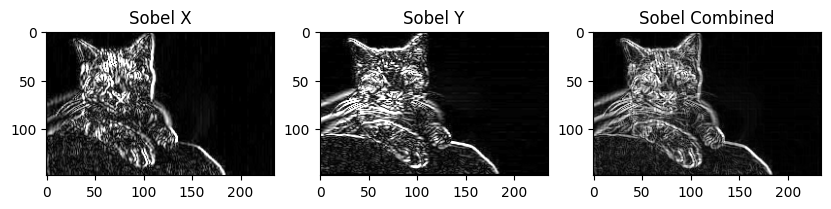

In [6]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Detects vertical edges
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Detects horizontal edges

# Convert gradients to absolute values and normalize
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Combine both directions
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap="gray"), plt.title("Sobel X")
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap="gray"), plt.title("Sobel Y")
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap="gray"), plt.title("Sobel Combined")
plt.show()

# 2. Canny Edge Detection

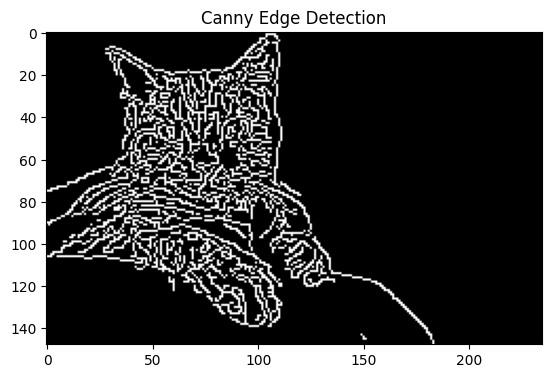

In [17]:
# Apply Canny edge detector
canny_edges = cv2.Canny(image, 100, 200)

plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()


# 3. Laplacian Filter

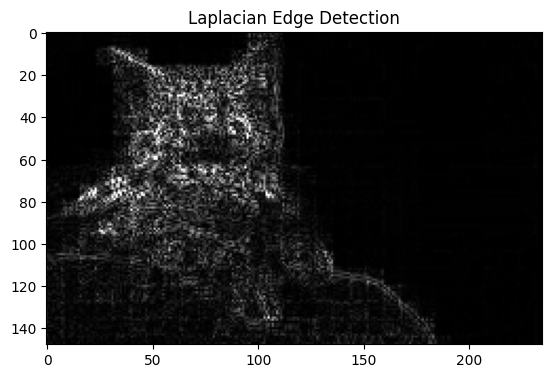

In [8]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

plt.imshow(laplacian, cmap="gray")
plt.title("Laplacian Edge Detection")
plt.show()


# 4. Harris Corner Detector

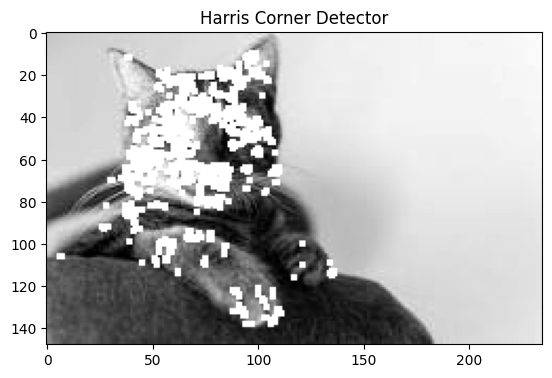

In [9]:
# Convert to float32 for Harris
gray = np.float32(image)
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate result for visibility
harris_corners = cv2.dilate(harris_corners, None)

# Mark corners in red
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = 255

plt.imshow(image_harris, cmap="gray")
plt.title("Harris Corner Detector")
plt.show()


# 5. SIFT (Scale-Invariant Feature Transform)

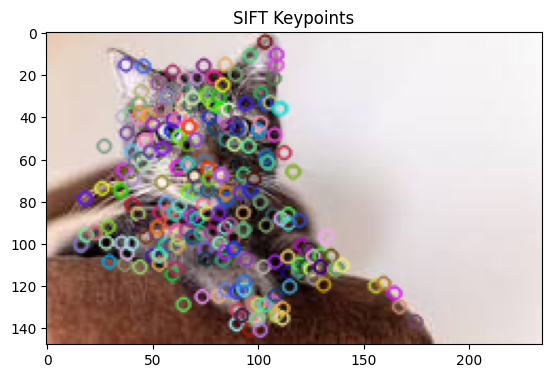

In [10]:
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
image_sift = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(cv2.cvtColor(image_sift, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.show()


# 6. Filter Bank for Texture Detection

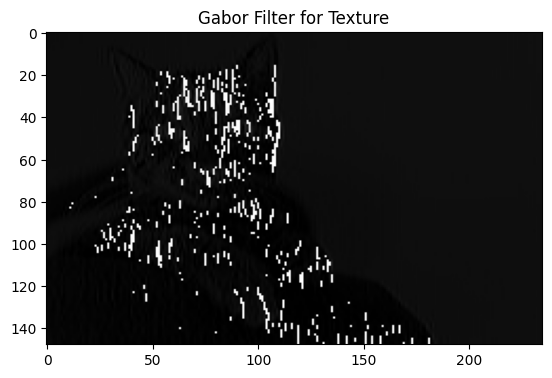

In [ ]:
from skimage.filters import gabor
gabor_filtered, _ = gabor(image, frequency=0.6)

plt.imshow(gabor_filtered, cmap="gray")
plt.title("Gabor Filter for Texture")
plt.show()


# 7. Feature Extraction for Classification Uing HOG

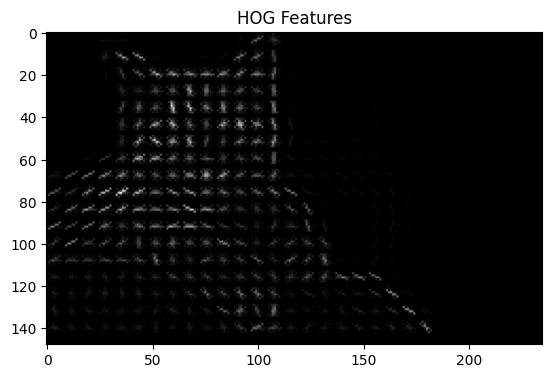

In [13]:
from skimage.feature import hog

# Compute HOG features
hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

plt.imshow(hog_image, cmap="gray")
plt.title("HOG Features")
plt.show()

# 8. MNIST dataset classification using HOG features

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt



In [20]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Feature Extraction using HOG
def extract_hog_features(images):
    feature_list = []
    for img in images:
        hog_features = hog(img, pixels_per_cell=(8,8), cells_per_block=(2,2), feature_vector=True)
        feature_list.append(hog_features)
    return np.array(feature_list)

In [21]:
# Extract features for training and testing
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Standardize features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

# Split further into training and validation sets
X_train_hog, X_val_hog, y_train, y_val = train_test_split(X_train_hog, y_train, test_size=0.1, random_state=42)

# Define ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_hog.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ANN
history = model.fit(X_train_hog, y_train, epochs=20, batch_size=128, validation_data=(X_val_hog, y_val))

Epoch 1/20


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8136 - loss: 0.6164 - val_accuracy: 0.9548 - val_loss: 0.1458
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.9611 - loss: 0.1220 - val_accuracy: 0.9612 - val_loss: 0.1231
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.9693 - loss: 0.0931 - val_accuracy: 0.9668 - val_loss: 0.1095
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.9753 - loss: 0.0751 - val_accuracy: 0.9655 - val_loss: 0.1010
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.9776 - loss: 0.0645 - val_accuracy: 0.9665 - val_loss: 0.1020
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9820 - loss: 0.0553 - val_accuracy: 0.9678 - val_loss: 0.1063
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9845 - loss: 0.0488 - val_accuracy: 0.9692 - val_loss: 0.1013
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9869 - loss: 0.0410 - val_accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9579 - loss: 0.1943
Test Accuracy: 0.9658


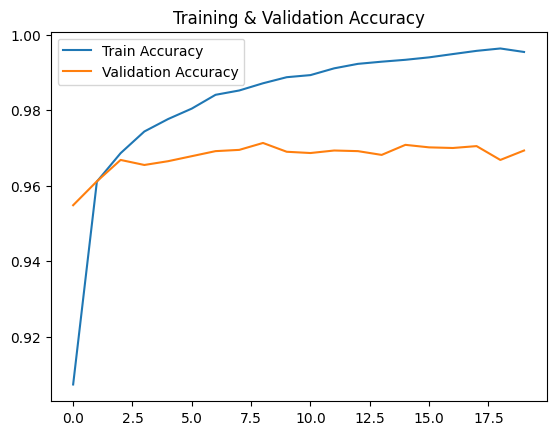

In [22]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_hog, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()